# Trihedral Reflectors Tests
test program versus results from **High Frequency Scattering from Trihedral Corner Reflectors and Other Benchmark Targets: SBR Versus Experiment**

In [19]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt

In [20]:
large_model = "large_trihedral_reflector"

rcs_file = "../output/" + large_model + '_rcs.csv'
exePath = "C://development//optix//OptixRCS//build//bin//Debug//TrianglesRcs.exe"

In [31]:
import math
def sph2cts(r, phi, theta):
    print("x:", r*math.sin(theta)*math.cos(phi))
    print("y:", r*math.sin(theta)*math.sin(phi))
    print("z:", r*math.cos(theta))

r=0.2286
phi=math.radians(0)
theta=math.radians(57)
sph2cts(r, phi, theta)

r=0.2286
phi=math.radians(90)
theta=math.radians(57)
sph2cts(r, phi, theta)

r=0.2286
phi=math.radians(45)
theta=math.radians(-33)
sph2cts(r, phi, theta)

x: 0.19172009183232394
y: 0.0
z: 0.12450448340443519
x: 1.1739469839734606e-17
y: 0.19172009183232394
z: 0.12450448340443519
x: -0.0880379645034041
y: -0.0880379645034041
z: 0.19172009183232394


In [33]:
phi = "-1,91,1"
theta = "90,90,1"
freq = "18E9"
subprocess.run([exePath, str(freq), str(phi), str(theta), large_model])

CompletedProcess(args=['C://development//optix//OptixRCS//build//bin//Debug//TrianglesRcs.exe', '18E9', '-1,91,1', '90,90,1', 'large_trihedral_reflector'], returncode=0)

In [34]:
csv = np.genfromtxt (rcs_file, delimiter=",")

# Extract phi and rcs columns from the DataFrame
freq_values = csv[:,0]
phi_values = csv[:,1]
theta_values = csv[:,2]
rcs_values = csv[:,3]
print("rcs max: ", max(rcs_values))
print("rcs min: ", min(rcs_values))

rcs max:  -30.6996
rcs min:  -57.3606


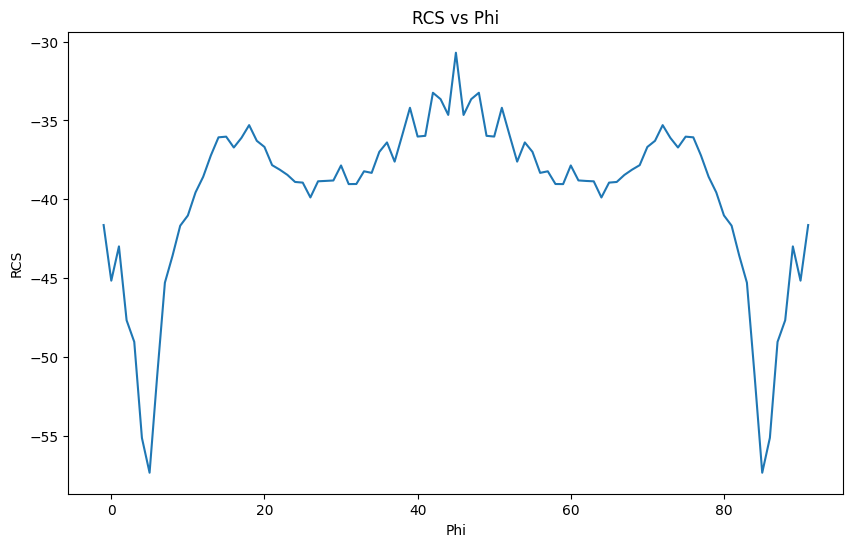

In [35]:
# Create the plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(phi_values, rcs_values)
plt.xlabel('Phi')  # X-axis label
plt.ylabel('RCS')  # Y-axis label
plt.title('RCS vs Phi')  # Plot title
plt.show()  # Display the plot

In [39]:
large_model = "large_trihedral_reflector_2"
phi = "45,45,1"
theta = "-1,91,1"
freq = "18E9"
subprocess.run([exePath, str(freq), str(phi), str(theta), large_model])

CompletedProcess(args=['C://development//optix//OptixRCS//build//bin//Debug//TrianglesRcs.exe', '18E9', '45,45,1', '-1,91,1', 'large_trihedral_reflector_2'], returncode=0)

rcs max:  17.9133 , at 0.0
rcs min:  -6.95801


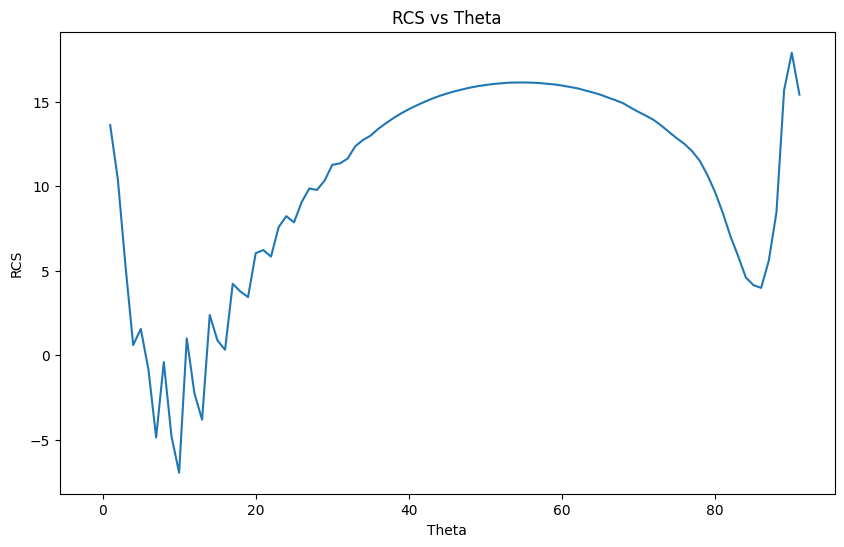

In [40]:
rcs_file = "../output/" + large_model + '_rcs.csv'
csv = np.genfromtxt (rcs_file, delimiter=",")

# Extract phi and rcs columns from the DataFrame
freq_values = csv[:,0]
phi_values = csv[:,1]
theta_values = csv[:,2]
rcs_values = csv[:,3]
max_index = rcs_values.argmax()
print("rcs max: ", max(rcs_values),", at", theta_values[max_index])
print("rcs min: ", min(rcs_values))

# Create the plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(theta_values, rcs_values)
plt.xlabel('Theta')  # X-axis label
plt.ylabel('RCS')  # Y-axis label
plt.title('RCS vs Theta')  # Plot title
plt.show()  # Display the plot